In [33]:
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

<script>
  jQuery(document).ready(function($) {

  $(window).load(function(){
    $('#preloader').fadeOut('slow',function(){$(this).remove();});
  });

  });
</script>

<style type="text/css">
  div#preloader { position: fixed;
      left: 0;
      top: 0;
      z-index: 999;
      width: 100%;
      height: 100%;
      overflow: visible;
      background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center;
  }

</style>

<div id="preloader"></div>

SyntaxError: invalid syntax (<ipython-input-33-7f66cbb1472b>, line 1)

###**The final idea is to get an 'LBC market price' for canon 7D body only**

> **Scope**: *Ile de France*

***Articles/Ressources that help me along the way***
- [Git repo: JM Portilla Web Scraping Tuto](https://github.com/jmportilla/Web-Scraping/blob/master/Web%20Scraping.ipynb)
- [Article: Querying Craiglist](http://predictablynoisy.com/querying-craigslist-with-python/)
- [Article: Quick Craiglist Data Analysis](http://predictablynoisy.com/quick-craigslist-data-analysis/)
- Useful Links:
    - http://stackoverflow.com/questions/16835449/python-beautifulsoup-extract-text-between-element#
- [Formating IPython Notebook with Markdown¶](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#videos)
- [Scraping multiple pages for parsing in Beautiful Soup](http://stackoverflow.com/questions/8334805/scraping-multiple-pages-for-parsing-in-beautiful-soup)

In [1]:
# Libraries export
from bs4 import BeautifulSoup
import requests

import pandas as pd
from pandas import Series, DataFrame

# regex module
import re

In [2]:
# Méthode pas très classe, à reprendre - done
#page_number = ['1', '2', '3', '4', '5', '6', '7', '8']
page_number = str(range(1,50))
data = []

for numb in page_number:
    url = 'https://www.leboncoin.fr/annonces/offres/ile_de_france/occasions/?o=' + numb + '&q=canon+7D'
    
    # Request content from web page
    result = requests.get(url)
    c = result.content
    
    # Set as Beautiful Soup Object
    soup = BeautifulSoup(c)
    
    # Take all title and price tag
    summary = soup.findAll(True, {'class':['title', 'price']})
    
    # list creation in data
    for content in summary:
        purchase_info = content.contents[0].strip()
        data.append(purchase_info)

/usr/local/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [6]:
type(data)

list

In [7]:
data[:10]

[u'Canon 7D + 18-55 + 17-55 BAS PRIX A SAIRIR',
 u'490\xa0\u20ac',
 u'Canon reflex EOS 7D',
 u'650\xa0\u20ac',
 u'Nacelle Stabilisateur Reflex (DSLR) Gimbal',
 u'590\xa0\u20ac',
 u'T\xe9l\xe9commande RC-6 pour appareil photo Canon',
 u'6\xa0\u20ac',
 u'Canon EF 24-85mm USM',
 u'100\xa0\u20ac']

In [8]:
# Function to check if there is a number in the string
# http://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number
# def num_there(s):
#    return any(i.isdigit() for i in s)


# https://www.udemy.com/learning-python-for-data-analysis-and-visualization/learn/#/lecture/2819010

# Set up empty lists
title = []
price = []

# Set index counter
index = 0

# Put title and price in different list
# there seems to be a natural 'counting index' in for...in... loop > hence the index+=1
for item in data:
    
    # if '€' in item, put the item before in 'title' and the current item in 'price'
    if u'\xa0\u20ac' in item:
        title.append(data[index-1])
        price.append(item)
    
    index += 1

In [9]:
title = Series(title)
price = Series(price)

In [10]:
# Concatenate into a DataFrame
annonce_df = pd.concat([title,price],axis=1)

In [11]:
annonce_df.columns = ['Title','Price']

In [12]:
type(annonce_df)

pandas.core.frame.DataFrame

In [13]:
annonce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3352 entries, 0 to 3351
Data columns (total 2 columns):
Title    3352 non-null object
Price    3352 non-null object
dtypes: object(2)
memory usage: 78.6+ KB


In [14]:
annonce_df['Price'] = annonce_df['Price'].replace(u'\xa0', ' ')
annonce_df.head(5)

,Title,Price
0,Canon 7D + 18-55 + 17-55 BAS PRIX A SAIRIR,490 €
1,Canon reflex EOS 7D,650 €
2,Nacelle Stabilisateur Reflex (DSLR) Gimbal,590 €
3,Télécommande RC-6 pour appareil photo Canon,6 €
4,Canon EF 24-85mm USM,100 €


In [15]:
annonce_df.dtypes

Title    object
Price    object
dtype: object

In [16]:
# Replace € and replace white space and then convert to int
annonce_df['Price'] = annonce_df['Price'].replace( u'\u20ac','', regex=True ).replace(' ', '',regex=True).astype(int)
annonce_df.head(30)

,Title,Price
0,Canon 7D + 18-55 + 17-55 BAS PRIX A SAIRIR,490
1,Canon reflex EOS 7D,650
2,Nacelle Stabilisateur Reflex (DSLR) Gimbal,590
3,Télécommande RC-6 pour appareil photo Canon,6
4,Canon EF 24-85mm USM,100
5,Canon EOS 7D + 3 batteries LP-E6 + 2 carte S,900
6,Télécommande intervallomètre -Canon-Pentax-Sam...,35
7,"Canon 7D gripé,flash 430EX,multiplicateur Kenko",1110
8,Canon 7D kit 18-135,850
9,CANON reflex numérique EOS 7D 33226 déc,649


In [17]:
annonce_df.dtypes

Title    object
Price     int64
dtype: object

In [18]:
annonce_df.describe()

,Price
count,3352.000000
mean,554.966587
std,506.559602
min,1.000000
25%,150.000000
50%,500.000000
75%,799.000000
max,6400.000000


In [19]:
def cat_500(price):
    if 0 <= price <= 500:
        return '0 - 500'
    if 501 <= price <= 1000:
        return '501 - 1000'
    if 1001 <= price <= 1500:
        return '1001 - 1500'
    if 1501 <= price:
        return 'Over 1500'
    
annonce_df['Price Cat'] = annonce_df['Price'].apply(cat_500).astype(str)
annonce_df.head()

,Title,Price,Price Cat
0,Canon 7D + 18-55 + 17-55 BAS PRIX A SAIRIR,490,0 - 500
1,Canon reflex EOS 7D,650,501 - 1000
2,Nacelle Stabilisateur Reflex (DSLR) Gimbal,590,501 - 1000
3,Télécommande RC-6 pour appareil photo Canon,6,0 - 500
4,Canon EF 24-85mm USM,100,0 - 500


In [20]:
annonce_df.dtypes

Title        object
Price         int64
Price Cat    object
dtype: object

In [21]:
# not so pretty, or method does not seem to work, find why?
def annonce_cat(title):
    if 'objectif' in title:
        return 'bundle'
    if 'objectifs' in title:
        return 'bundle'
    if '+' in title:
        return 'bundle'
    if ',' in title:
        return 'bundle'
    if 'II' in title:
        return 'Mark II'
    else: 
        return 'body'

annonce_df['Annonce Cat'] = annonce_df['Title'].apply(annonce_cat)
annonce_df.head()

,Title,Price,Price Cat,Annonce Cat
0,Canon 7D + 18-55 + 17-55 BAS PRIX A SAIRIR,490,0 - 500,bundle
1,Canon reflex EOS 7D,650,501 - 1000,body
2,Nacelle Stabilisateur Reflex (DSLR) Gimbal,590,501 - 1000,body
3,Télécommande RC-6 pour appareil photo Canon,6,0 - 500,body
4,Canon EF 24-85mm USM,100,0 - 500,body


####Cleaned DF

In [22]:
cleaned_df = annonce_df[annonce_df['Title'].str.contains('(7D|7d)', regex=True)]
cleaned_df.head(10)

/usr/local/lib/python2.7/site-packages/pandas/core/strings.py:207: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  " groups, use str.extract.", UserWarning)


,Title,Price,Price Cat,Annonce Cat
0,Canon 7D + 18-55 + 17-55 BAS PRIX A SAIRIR,490,0 - 500,bundle
1,Canon reflex EOS 7D,650,501 - 1000,body
5,Canon EOS 7D + 3 batteries LP-E6 + 2 carte S,900,501 - 1000,bundle
7,"Canon 7D gripé,flash 430EX,multiplicateur Kenko",1110,1001 - 1500,bundle
8,Canon 7D kit 18-135,850,501 - 1000,body
9,CANON reflex numérique EOS 7D 33226 déc,649,501 - 1000,body
12,CANON 7D + Sigma 17-70 + nombreux accésoires,750,501 - 1000,bundle
13,Canon Boitier 7D nu,500,0 - 500,body
16,Canon EOS7D: kit complet très bon état +2 opti...,1350,1001 - 1500,bundle
18,Canon EOS 7d + objectif 50mm f/1.8 ll,700,501 - 1000,bundle


In [23]:
cleaned_df.describe()

,Price
count,1585.000000
mean,776.051104
std,353.497856
min,15.000000
25%,600.000000
50%,700.000000
75%,950.000000
max,2000.000000


In [24]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[Box and whisker plot | Descriptive statistics | Probability and Statistics](https://www.youtube.com/watch?v=b2C9I8HuCe4&feature=youtu.be)

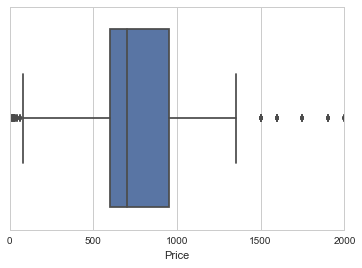

In [25]:
sns.set_style("whitegrid")
sns.boxplot(x='Price', data=cleaned_df)

In [26]:
body = cleaned_df[cleaned_df['Annonce Cat'] == 'body']
bundle = cleaned_df[cleaned_df['Annonce Cat'] == 'bundle']
mark_II = cleaned_df[cleaned_df['Annonce Cat'] == 'Mark II']

In [27]:
body.describe()

,Price
count,776.000000
mean,636.496134
std,316.629532
min,15.000000
25%,500.000000
50%,630.000000
75%,800.000000
max,1500.000000


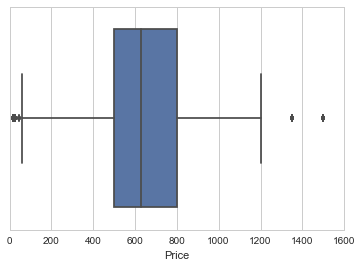

In [28]:
sns.set_style("whitegrid")
sns.boxplot(x='Price', data=body)

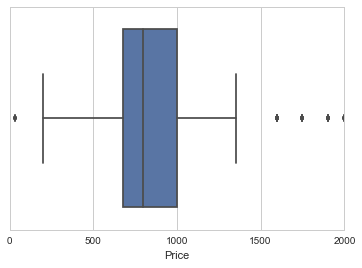

In [29]:
sns.set_style("whitegrid")
sns.boxplot(x='Price', data=bundle)

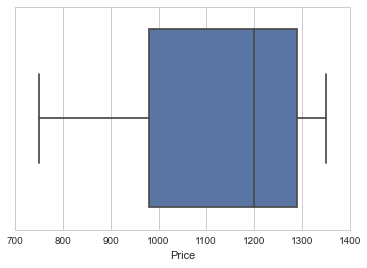

In [30]:
sns.set_style("whitegrid")
sns.boxplot(x='Price', data=mark_II)

---
**Areas of improvements**
- ~~change prices into integer~~
- ~~Remove wrong 'annonces' and 'annonces' that sell also lenses~~~
- add publishing dates of the 'annonce'